# Unit 12 - Tales from the Crypto

---


## 1. Sentiment Analysis

Use the [newsapi](https://newsapi.org/) to pull the latest news articles for Bitcoin and Ethereum and create a DataFrame of sentiment scores for each coin.

Use descriptive statistics to answer the following questions:
1. Which coin had the highest mean positive score?
2. Which coin had the highest negative score?
3. Which coin had the highest positive score?

In [1]:
# Initial imports
import os
import pandas as pd
from dotenv import load_dotenv
import nltk as nltk
nltk.download('vader_lexicon')
from nltk.sentiment.vader import SentimentIntensityAnalyzer
analyzer = SentimentIntensityAnalyzer()
nltk.download('vader_lexicon')
from newsapi import NewsApiClient

from nltk.tokenize import word_tokenize, sent_tokenize
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer, PorterStemmer
from string import punctuation
import re

from collections import Counter
from nltk import ngrams

from wordcloud import WordCloud
import matplotlib.pyplot as plt
plt.style.use('seaborn-whitegrid')
import matplotlib as mpl
mpl.rcParams['figure.figsize'] = [20.0, 10.0]

import spacy
from spacy import displacy

%matplotlib inline

[nltk_data] Downloading package vader_lexicon to
[nltk_data]     C:\Users\xElio\AppData\Roaming\nltk_data...
[nltk_data]   Package vader_lexicon is already up-to-date!
[nltk_data] Downloading package vader_lexicon to
[nltk_data]     C:\Users\xElio\AppData\Roaming\nltk_data...
[nltk_data]   Package vader_lexicon is already up-to-date!


In [2]:
# Reading api key environment variable
load_dotenv()
api_key = os.getenv("NEWS_API_KEY")

In [3]:
# Creating a newsapi client
newsapi = NewsApiClient(api_key=api_key)

In [4]:
# Fetching the Bitcoin news articles
btc_articles = newsapi.get_everything(
    q="Bitcoin AND bitcoin AND BTC",
    language="en",
    page_size=100,
    sort_by="relevancy"
)

# Checking the amount articles containing Bitcoin
print(f"Amount of articles featuring Bitcoin: {btc_articles['totalResults']}")

Amount of articles featuring Bitcoin: 1789


In [5]:
# Fetching the Ethereum news articles
eth_articles = newsapi.get_everything(
    q="Ethereum AND ethereum AND ETH",
    language='en',
    page_size=100,
    sort_by="relevancy"
)

# Checking the amount of news articles containing Ethereum
print(f"Amount of articles featuringg Ethereum: {eth_articles['totalResults']}")
# Checking a sample to see what it contains 
print(f"First sample: {eth_articles['articles'][0]}")

Amount of articles featuringg Ethereum: 862
First sample: {'source': {'id': 'the-verge', 'name': 'The Verge'}, 'author': 'Corin Faife', 'title': 'Crypto.com admits over $30 million stolen by hackers', 'description': 'Cryptocurrency exchange Crypto.com has said that $15 million in ethereum and $18 million in bitcoin were stolen by hackers in a security breach', 'url': 'https://www.theverge.com/2022/1/20/22892958/crypto-com-exchange-hack-bitcoin-ethereum-security', 'urlToImage': 'https://cdn.vox-cdn.com/thumbor/mde_l3lUC4muDPEFG7LYrUz0O3g=/0x146:2040x1214/fit-in/1200x630/cdn.vox-cdn.com/uploads/chorus_asset/file/8921023/acastro_bitcoin_2.jpg', 'publishedAt': '2022-01-20T13:23:31Z', 'content': 'In a new blog post the company said that 4,836 ETH and 443 bitcoin were taken\r\nIllustration by Alex Castro / The Verge\r\nIn a blog post published in the early hours of Thursday morning, cryptocurrency… [+2004 chars]'}


In [7]:
# Create the Bitcoin sentiment scores DataFrame
btc_sents = []
for article in btc_articles["articles"]:
    try:
        title = article['title']
        text = article['content'].lower()
        date = article['publishedAt']
        sentiment = analyzer.polarity_scores(text)
        compound = sentiment["compound"]
        pos = sentiment["pos"]
        neu = sentiment["neu"]
        neg = sentiment["neg"]
            
        btc_sents.append({
        "Title": title,
        "Text": text,
        "Date": date,
        "Compound": compound,
        "Positive": pos,
        "Negative": neg,
        "Neutral": neu})
    except AttributeError:
        pass
        
# Making it into a datarame
btc_df = pd.DataFrame(btc_sents)
# Viewing dataframe
btc_df.head()

,Title,Text,Date,Compound,Positive,Negative,Neutral
0,Crypto.com admits over $30 million stolen by h...,"in a new blog post the company said that 4,836...",2022-01-20T13:23:31Z,0.0000,0.000,0.000,1.000
1,BUZZ Crypto stocks slip as bitcoin briefly sli...,** shares of cryptocurrency and blockchain-rel...,2022-01-10T15:31:00Z,0.3818,0.128,0.057,0.815
2,Crypto investors buy the dip as Bitcoin falls ...,welcome to kitco news' 2022 outlook series. th...,2022-01-10T22:36:00Z,0.1531,0.076,0.061,0.863
3,Bitcoin death cross is staring down bulls afte...,after one of roughest patches ever for bitcoin...,2022-01-11T14:54:48Z,-0.5563,0.063,0.156,0.781
4,Crypto.com loses $34 million in hack that affe...,"in an interview with bloomberg tv, crypto.com'...",2022-01-20T11:05:19Z,0.1027,0.046,0.000,0.954


In [8]:
# Create the Ethereum sentiment scores DataFrame
eth_sents = []
for article in eth_articles["articles"]:
    try:
        title = article['title']
        text = article['content'].lower()
        date = article['publishedAt'][:10]
        sentiment = analyzer.polarity_scores(text)
        compound = sentiment["compound"]
        pos = sentiment["pos"]
        neu = sentiment["neu"]
        neg = sentiment["neg"]
            
        eth_sents.append({
        "Title": title,
        "Text": text,
        "Date": date,
        "Compound": compound,
        "Positive": pos,
        "Negative": neg,
        "Neutral": neu})
    except AttributeError:
        pass
        
# Making it into a datarame
eth_df = pd.DataFrame(eth_sents)
# Viewing dataframe
eth_df.head()

,Title,Text,Date,Compound,Positive,Negative,Neutral
0,Crypto.com admits over $30 million stolen by h...,"in a new blog post the company said that 4,836...",2022-01-20,0.0000,0.000,0.000,1.000
1,Crypto.com loses $34 million in hack that affe...,"in an interview with bloomberg tv, crypto.com'...",2022-01-20,0.1027,0.046,0.000,0.954
2,Blockchain platform Wormhole says it's retriev...,"online thieves made off with ""wrapped ethereum...",2022-02-03,0.1027,0.131,0.092,0.778
3,Hacker steals over $320M from blockchain platf...,"online thieves made off with 120,000 weth, or ...",2022-02-03,-0.6808,0.051,0.174,0.775
4,Crypto Exchange Shuts Down Withdrawals After H...,the crypto market's whiplash volatility can ma...,2022-01-19,0.5574,0.129,0.000,0.871


In [9]:
# Describe the Bitcoin Sentiment
btc_df.describe()

,Compound,Positive,Negative,Neutral
count,100.000000,100.000000,100.00000,100.000000
mean,0.088254,0.067420,0.04462,0.887980
std,0.413903,0.069358,0.05660,0.080962
min,-0.802000,0.000000,0.00000,0.674000
25%,-0.190050,0.000000,0.00000,0.824250
50%,0.051600,0.063500,0.00000,0.893500
75%,0.386825,0.113250,0.08300,0.942500
max,0.924600,0.302000,0.20400,1.000000


In [10]:
# Describe the Ethereum Sentiment
eth_df.describe()

,Compound,Positive,Negative,Neutral
count,100.000000,100.000000,100.000000,100.000000
mean,0.149070,0.084480,0.048340,0.867180
std,0.435892,0.072405,0.066196,0.095953
min,-0.765000,0.000000,0.000000,0.596000
25%,-0.065725,0.000000,0.000000,0.802500
50%,0.177900,0.079500,0.000000,0.873000
75%,0.514625,0.131000,0.092250,0.937000
max,0.858800,0.309000,0.232000,1.000000


### Questions:

Q: Which coin had the highest mean positive score?

A: 

Q: Which coin had the highest compound score?

A: 

Q. Which coin had the highest positive score?

A: 

---

## 2. Natural Language Processing
---
###   Tokenizer

In this section, you will use NLTK and Python to tokenize the text for each coin. Be sure to:
1. Lowercase each word.
2. Remove Punctuation.
3. Remove Stopwords.

In [23]:
# Instantiate the lemmatizer
lemmatizer = WordNetLemmatizer()

# Create a list of stopwords
sw = set(stopwords.words('english'))

# Expand the default stopwords list if necessary
sw_addon = {'url', 'urlToImage', 'char', 'ha', 'wa'}

In [24]:
# Complete the tokenizer function
def tokenizer(article):
    """Tokenizes text."""
    
    # Remove the punctuation from text
    regex = re.compile("[^a-zA-Z ]")
    re_clean = regex.sub('', article)
    # Create a tokenized list of the words
    words = word_tokenize(re_clean)
    
    # Lemmatize words into root words
    lem = [lemmatizer.lemmatize(word) for word in words]
   
    # Convert the words to lowercase
    # Remove the stop words
    tokens = [word.lower() for word in lem if word.lower() not in sw.union(sw_addon)]
    
    return tokens

In [54]:
# Create a new tokens column for Bitcoin
# Create empty tokenized list
tokenized = []

# Tokenizing the Text column for each row of the DataFrame
for article in btc_df['Text']:
    # Tokenizer function to tokenize the article
    tokenized_articles = tokenizer(article)
    # Appending all tokens to list
    tokenized.append({'tokens':tokenized_articles})

# Making it a dataframe
tokens_df= pd.DataFrame(tokenized)

# Adding tokens to the new tokens column in original df
btc_df['Tokens'] = tokens_df

# Viewing
btc_df.head()

,Title,Text,Date,Compound,Positive,Negative,Neutral,Tokens
0,Crypto.com admits over $30 million stolen by h...,"in a new blog post the company said that 4,836...",2022-01-20T13:23:31Z,0.0000,0.000,0.000,1.000,"[new, blog, post, company, said, eth, bitcoin,..."
1,BUZZ Crypto stocks slip as bitcoin briefly sli...,** shares of cryptocurrency and blockchain-rel...,2022-01-10T15:31:00Z,0.3818,0.128,0.057,0.815,"[share, cryptocurrency, blockchainrelated, fir..."
2,Crypto investors buy the dip as Bitcoin falls ...,welcome to kitco news' 2022 outlook series. th...,2022-01-10T22:36:00Z,0.1531,0.076,0.061,0.863,"[welcome, kitco, news, outlook, series, new, y..."
3,Bitcoin death cross is staring down bulls afte...,after one of roughest patches ever for bitcoin...,2022-01-11T14:54:48Z,-0.5563,0.063,0.156,0.781,"[one, roughest, patch, ever, bitcoin, enthusia..."
4,Crypto.com loses $34 million in hack that affe...,"in an interview with bloomberg tv, crypto.com'...",2022-01-20T11:05:19Z,0.1027,0.046,0.000,0.954,"[interview, bloomberg, tv, cryptocoms, chief, ..."


In [53]:
# Create a new tokens column for Ethereum
# Create empty tokenized list
tokenized = []

# Tokenizing the Text column for each row of the DataFrame
for article in eth_df['Text']:
    # Tokenizer function to tokenize the article
    tokenized_articles = tokenizer(article)
    # Appending all tokens to list
    tokenized.append({'tokens':tokenized_articles})

# Making it a dataframe
tokens_df= pd.DataFrame(tokenized)

# Adding tokens to the new tokens column in original df
eth_df['Tokens'] = tokens_df

# Viewing
eth_df.head()

,Title,Text,Date,Compound,Positive,Negative,Neutral,Tokens
0,Crypto.com admits over $30 million stolen by h...,"in a new blog post the company said that 4,836...",2022-01-20,0.0000,0.000,0.000,1.000,"[new, blog, post, company, said, eth, bitcoin,..."
1,Crypto.com loses $34 million in hack that affe...,"in an interview with bloomberg tv, crypto.com'...",2022-01-20,0.1027,0.046,0.000,0.954,"[interview, bloomberg, tv, cryptocoms, chief, ..."
2,Blockchain platform Wormhole says it's retriev...,"online thieves made off with ""wrapped ethereum...",2022-02-03,0.1027,0.131,0.092,0.778,"[online, thief, made, wrapped, ethereum, worth..."
3,Hacker steals over $320M from blockchain platf...,"online thieves made off with 120,000 weth, or ...",2022-02-03,-0.6808,0.051,0.174,0.775,"[online, thief, made, weth, wrapped, ethereum,..."
4,Crypto Exchange Shuts Down Withdrawals After H...,the crypto market's whiplash volatility can ma...,2022-01-19,0.5574,0.129,0.000,0.871,"[crypto, market, whiplash, volatilitycan, make..."


---

### NGrams and Frequency Analysis

In this section you will look at the ngrams and word frequency for each coin. 

1. Use NLTK to produce the n-grams for N = 2. 
2. List the top 10 words for each coin. 

In [27]:
# Generate the Bitcoin N-grams where N=2
btc_bigrams = [Counter(ngrams(tokens, 2)) for tokens in btc_df["Tokens"]]

In [28]:
# Generate the Ethereum N-grams where N=2
eth_bigrams = [Counter(ngrams(tokens, 2)) for tokens in eth_df["Tokens"]]

In [29]:
# Function token_count generates the top 10 words for a given coin
def token_count(tokens, N=10):
    """Returns the top N tokens from the frequency count"""
    return Counter(tokens).most_common(N)

In [30]:
# Use token_count to get the top 10 words for Bitcoin
# Will create new list variable to separate from main df
toks_btc = []

# Have to use a loop in order to pull each token into the new list variable 
for tokens in btc_df["Tokens"]:
    toks_btc += tokens

# Getting top 10 words with a count feature within tokens library  
btc_top10 = token_count(toks_btc)
btc_top10

[('bitcoin', 83),
 ('crypto', 28),
 ('btc', 25),
 ('market', 23),
 ('cryptocurrency', 18),
 ('price', 14),
 ('month', 13),
 ('day', 12),
 ('mining', 12),
 ('new', 10)]

In [31]:
# Use token_count to get the top 10 words for Bitcoin
# Will create new list variable to separate from main df
toks_eth = []

# Have to use a loop in order to pull each token into the new list variable 
for tokens in eth_df["Tokens"]:
    toks_eth += tokens

# Getting top 10 words with a count feature within tokens library  
eth_top10 = token_count(toks_eth)
eth_top10


[('ethereum', 34),
 ('cryptocurrency', 31),
 ('crypto', 21),
 ('market', 19),
 ('eth', 17),
 ('bitcoin', 17),
 ('world', 13),
 ('worth', 12),
 ('blockchain', 12),
 ('one', 12)]

---

### Word Clouds

In this section, you will generate word clouds for each coin to summarize the news for each coin

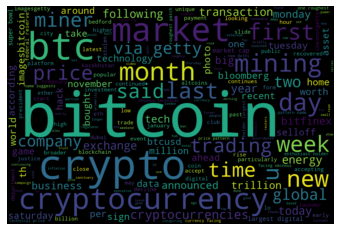

In [43]:
# Generate the Bitcoin word cloud
wordcloud_plot_btc_df = ' '.join(toks_btc)
wc = WordCloud(width=1500, height=1000).generate(wordcloud_plot_btc_df)
plt.imshow(wc, interpolation='bilinear')
plt.axis("off")
plt.show();

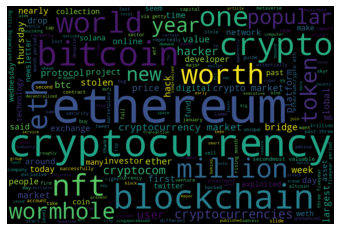

In [44]:
# Generate the Ethereum word cloud
wordcloud_plot_btc_df = ' '.join(toks_eth)
wc = WordCloud(width=1500, height=1000).generate(wordcloud_plot_btc_df)
plt.imshow(wc, interpolation='bilinear')
plt.axis("off")
plt.show();

---
## 3. Named Entity Recognition

In this section, you will build a named entity recognition model for both Bitcoin and Ethereum, then visualize the tags using SpaCy.

In [45]:
# Load the spaCy model
nlp = spacy.load('en_core_web_sm')

---
### Bitcoin NER

In [47]:
# Concatenate all of the Bitcoin text together
# Need just the text so will need to loop through articles and pull their texts into a new list variable 
listed_text = []

for text in btc_df['Text']:
    list_btc = text
    listed_text.append(list_btc)

# Join the items in the bitcoin_text list into one big string    
btc_text = ' '.join(listed_text)

# Inspect bitcoin_all_text_big_string
btc_text

'in a new blog post the company said that 4,836 eth and 443 bitcoin were taken\r\nillustration by alex castro / the verge\r\nin a blog post published in the early hours of thursday morning, cryptocurrency… [+2004 chars] ** shares of cryptocurrency and blockchain-related firms fall after bitcoin briefly slides below $40,000 to a 5-month low\r\n** the world\'s largest digital asset was last down 2.6% at $40,800 after fal… [+1132 chars] welcome to kitco news\' 2022 outlook series. the new year will be filled with uncertainty as the federal reserve looks to pivot and tighten its monetary policies. at the same time, the inflation threa… [+2832 chars] after one of roughest patches ever for bitcoin enthusiasts, holders of the largest digital currency are facing an ominous technical price pattern with a name that suggests more pain ahead.\xa0\r\nknown as… [+3529 chars] in an interview with bloomberg tv, crypto.com\'s chief executive kris marszalek has admitted that 400 customer accounts were c

In [56]:
# Run the NER processor on all of the text
btc_ner = nlp(btc_text)

# Add a title to the document
btc_ner.user_data["title"] = "BTC Ner Processor"

In [57]:
# Render the visualization
displacy.render(btc_ner, style='ent')

In [52]:
# List all Entities
btc_ents = set([ent.text for ent in btc_ner.ents ])
btc_ents

{'$1 million',
 '$1.27 trillion',
 '$1.4 trillion',
 '$2 trillion',
 '$25 million',
 '$3.6 billion',
 '$4.5 billion',
 '$65 million',
 '$9 trillion',
 '+0.12',
 '+0.52%',
 '+11.34%',
 '+1773',
 '+1798',
 '+3049',
 '+4176',
 '-1.71%',
 '1',
 '1,000',
 '1,077',
 '1.11%',
 '1.54%',
 '1.6%',
 '1.93%',
 '100',
 '10:38',
 '119,756',
 '120,000',
 '1808',
 '1982',
 '1:30 p.m.',
 '2',
 '2%',
 '2.6%',
 '2013',
 '2016',
 '2020',
 '2021',
 '2022',
 '25th july',
 '270',
 '2955',
 '3.8',
 '315%',
 '38,180',
 '395 per cent',
 '4',
 '4%',
 '4,836',
 '4.5bn',
 '40,000',
 '40,800',
 '400',
 '40569',
 '44-year-old',
 '443',
 '4501',
 '462.1',
 '484.5',
 '4th',
 '5-month',
 '50',
 '50-day',
 '500',
 '60',
 '660',
 '68%',
 '68,999.99',
 '7.5',
 '75,000',
 'a good year',
 'a month',
 'about 30%',
 'above $38,000',
 'above $44,000',
 'alex castro',
 'alex kantrowitz',
 'ali khan',
 'amazon',
 'andre iguodala',
 'approximately $63.7 million',
 'april 5th 2021',
 'around $1.5 trillion',
 'around $36,500',
 'ar

---

### Ethereum NER

In [55]:
# Concatenate all of the Ethereum text together
# Need just the text so will need to loop through articles and pull their texts into a new list variable 
listed_text_eth = []

for text in eth_df['Text']:
    list_btc = text
    listed_text_eth.append(list_btc)

# Join the items in the bitcoin_text list into one big string    
eth_text = ' '.join(listed_text_eth)

# Inspect bitcoin_all_text_big_string
eth_text

'in a new blog post the company said that 4,836 eth and 443 bitcoin were taken\r\nillustration by alex castro / the verge\r\nin a blog post published in the early hours of thursday morning, cryptocurrency… [+2004 chars] in an interview with bloomberg tv, crypto.com\'s chief executive kris marszalek has admitted that 400 customer accounts were compromised by hackers. he said his team detected unauthorized transactions… [+2811 chars] online thieves made off with "wrapped ethereum" worth nearly $324 million.\r\ngetty images\r\nhackers stole more than $324 million in cryptocurrency from wormhole, the developers behind the popular block… [+1664 chars] online thieves made off with 120,000 weth, or wrapped ethereum, worth nearly $324 million.\r\ngetty images\r\nhackers have stolen more than $324 million in cryptocurrency from wormhole, the developers be… [+1553 chars] the crypto market\'s whiplash volatility\xa0can make investing in certain coins feel like a major gamble, especially to those 

In [58]:
# Run the NER processor on all of the text
eth_ner = nlp(eth_text)

# Add a title to the document
eth_ner.user_data["title"] = "ETH Ner Processor"

In [59]:
# Render the visualization
displacy.render(eth_ner, style='ent')

In [60]:
# List all Entities
eth_ents = set([ent.text for ent in eth_ner.ents ])
eth_ents

{'$1 billion',
 '$1.27 trillion',
 '$1.4 trillion',
 '$10 million',
 '$15 billion',
 '$15 million',
 '$2 trillion',
 '$250 million',
 '$322 million',
 '$325 million',
 '+0.12',
 '+0.52%',
 '+11.34%',
 '+1112',
 '+3049',
 '+3176',
 '+402',
 '+6779',
 '0.95',
 '1',
 '1.20',
 '1.6%',
 '1.93%',
 '10 years',
 '12-month',
 '120,000',
 '120k',
 '1808',
 '2,160',
 '2,400',
 '2,450',
 '200',
 '2009',
 '2015',
 '2021',
 '2022',
 '25%',
 '27 days',
 '2955',
 '3,000',
 '3,120',
 '3000',
 '3050',
 '36.2%',
 '4,600',
 '4,836',
 '4.3',
 '40 acres',
 '40,000',
 '400',
 '40569',
 '409%',
 '443',
 '4501',
 '500',
 '60',
 '7000',
 '724,948',
 '7343location',
 '80%',
 '90',
 'about $2,300',
 'about $320',
 'about $320m',
 'accordi',
 'alex castro',
 'alex kantrowitz',
 'ali khan',
 'amazon',
 'an estimated $322',
 'an estimated 4,600',
 'an ethereum year-end',
 'an uncertain weekend',
 'around $320 million',
 'as of jan. 27',
 'at least $15 million',
 'at least one',
 'bitcoin(crypto',
 'bloomberg tv',
 '

---